In [93]:
import matplotlib
import matplotlib.pyplot as plt

In [94]:
subsampling_mode = "sub"
# subsampling_mode = "nosub"

optimiser = "GD"
# optimiser = "minibatch"
# batchsize = 5
# batchsize = 10
# batchsize = 20

result_types = [
    "GD-sub",
    "GD-nosub",
    "minibatch5-nosub",
    "minibatch10-nosub",
    "minibatch20-nosub",
    "minibatch20-sub"
]


final_result = {}

for t in result_types:
    with open(f"./results/parsed/{t}.txt", "w") as out:
        results = []
        for i in range(1, 6):
            result = {}
            iteration = 1
            with open(f"./results/raw/{t}/client{i}_log.txt", "r") as f:
                lines = f.readlines()
                for line in lines:
                    if "tensor" in line:
                        result[iteration] = {
                            "loss": line.replace("tensor(", "").replace(")\n", "")
                        }
                    if "Accuracy of" in line:
                        result[iteration]["accuracy"] = line.replace(f"Accuracy of client{i} is: ", "").replace(" %\n", "")
                        iteration += 1
#                 print(lines)
            
            results.append(result)
        
        final_output = {}
        for i in range(1, len(results[0].items())+1):
            total_loss = 0
            total_accuracy = 0
            for data in results:
                total_loss += float(data[i]['loss'])
                total_accuracy += float(data[i]['accuracy'])
            avg_loss_across_clients = total_loss / len(results)
            avg_accuracy_across_clients = total_accuracy / len(results)
            final_output[i] = {
                "avg_loss": avg_loss_across_clients,
                "avg_accuracy": avg_accuracy_across_clients
            }
        
        for i in range(1, len(results[0].items())+1):
            curr_iter_data = final_output[i]
            out.write(f'iter {i} | avg_loss {curr_iter_data["avg_loss"]} | avg_accuracy {curr_iter_data["avg_accuracy"]}\n')
            
        final_result[t] = final_output
            

In [95]:
def plot(compare, data_type, ylabel, xlabel):
    plt.figure(1,figsize=(13, 13))

    x_axis = [i for i in range(1, 101)]
    for t in compare:
        y_axis = []
        for i in range(1, 101):
            y_axis.append(final_result[t][i][data_type])

        plt.plot(x_axis, y_axis, label=t, linewidth=1)

    plt.legend(loc='upper right', prop={'size': 12}, ncol=2)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

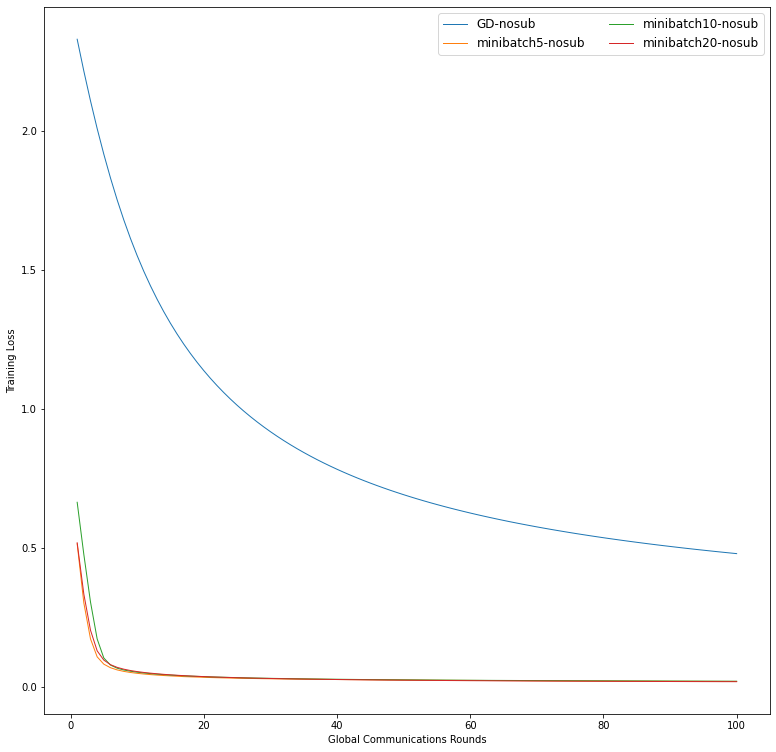

In [96]:
# plot loss for minibatch, compare different sizes

compare = [
    "GD-nosub",
    "minibatch5-nosub",
    "minibatch10-nosub",
    "minibatch20-nosub",
]

plot(compare, data_type='avg_loss', ylabel='Training Loss', xlabel='Global Communications Rounds')

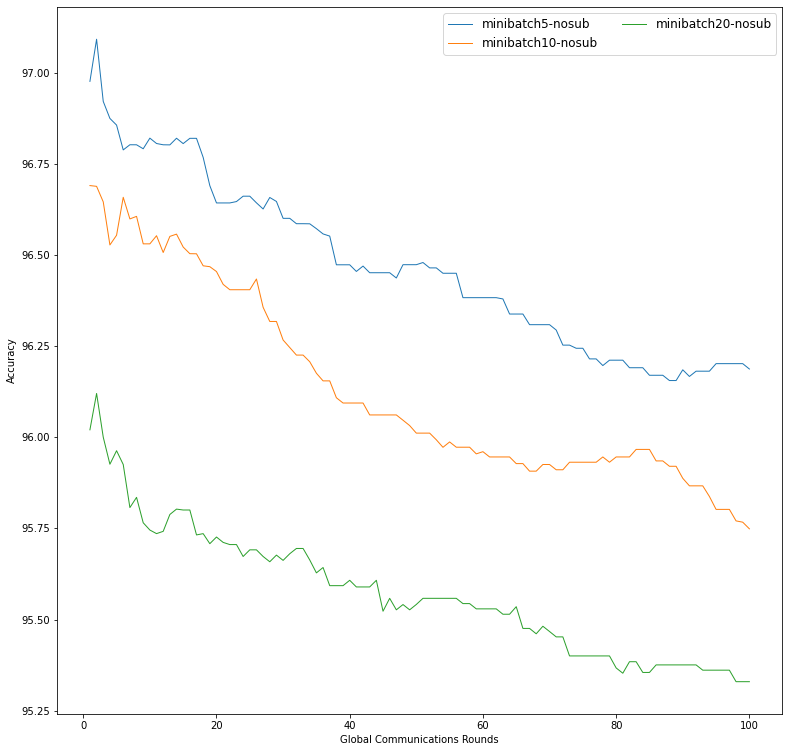

In [97]:
# plot accuracy for minibatch, compare different sizes

compare = [
#     "GD-nosub",
    "minibatch5-nosub",
    "minibatch10-nosub",
    "minibatch20-nosub",
]

plot(compare, data_type='avg_accuracy', ylabel='Accuracy', xlabel='Global Communications Rounds')

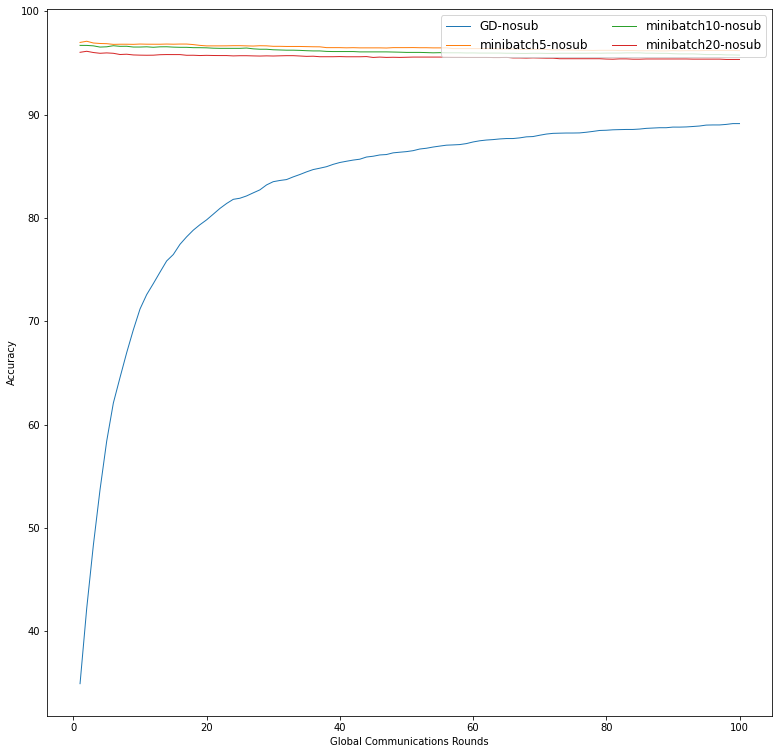

In [98]:
# plot accuracy for minibatch, compare different sizes including GD

compare = [
    "GD-nosub",
    "minibatch5-nosub",
    "minibatch10-nosub",
    "minibatch20-nosub",
]

plot(compare, data_type='avg_accuracy', ylabel='Accuracy', xlabel='Global Communications Rounds')

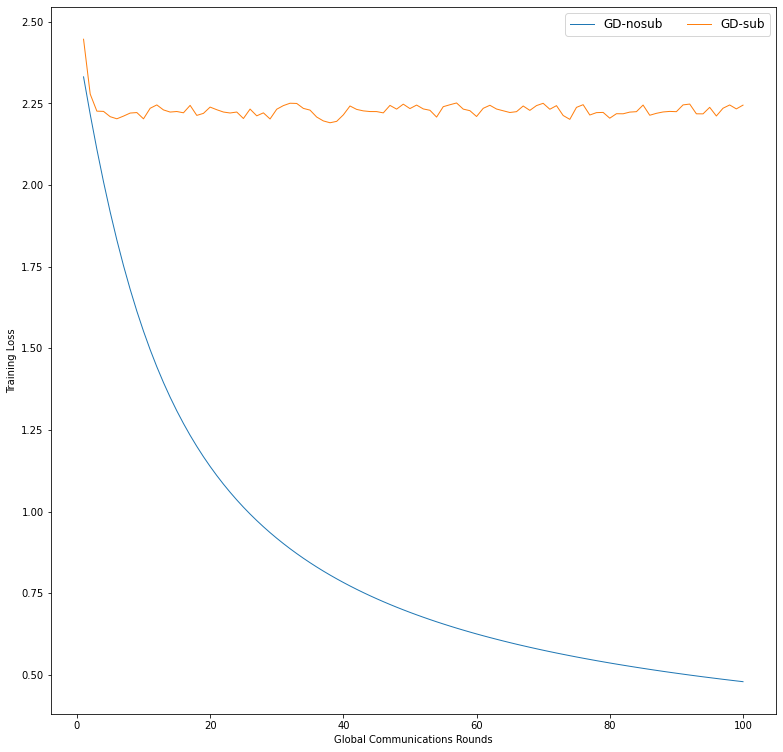

In [99]:
# plot loss, compare subsampling and no subsampling


# compare = [
#     "GD-nosub",
#     "GD-sub",
#     "minibatch20-nosub",
#     "minibatch20-sub"
# ]

# compare = [
#     "minibatch20-nosub",
#     "minibatch20-sub"
# ]

compare = [
    "GD-nosub",
    "GD-sub"
]

plot(compare, data_type='avg_loss', ylabel='Training Loss', xlabel='Global Communications Rounds')

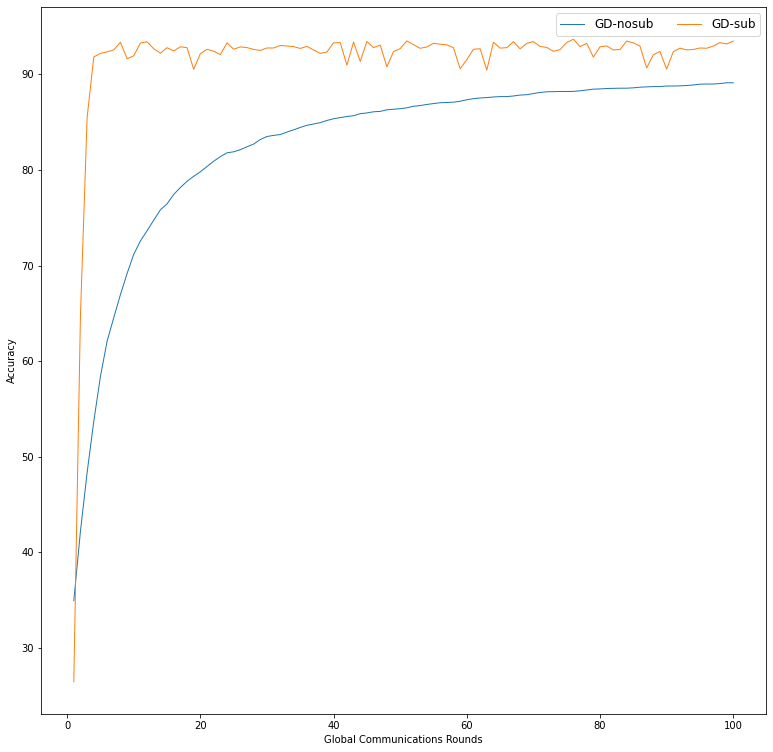

In [100]:
# plot accuracy, compare subsampling and no subsampling

# compare = [
#     "GD-nosub",
#     "GD-sub",
#     "minibatch20-nosub",
#     "minibatch20-sub"
# ]

# compare = [
#     "minibatch20-nosub",
#     "minibatch20-sub"
# ]

compare = [
    "GD-nosub",
    "GD-sub"
]


plot(compare, data_type='avg_accuracy', ylabel='Accuracy', xlabel='Global Communications Rounds')

In [101]:
# loss = [1,2,1]
# rounds = ["hello","sdsd","sdssd"]
# loss1 = [11,23,12]
# # rounds = ["hello","sdsd","sdssd"]


# plt.figure(1,figsize=(5, 5))
# plt.plot(rounds, loss, label="FedAvg", linewidth=1)
# plt.plot(rounds, loss1, label="FedAvg", linewidth=1)
# plt.legend(loc='upper right', prop={'size': 12}, ncol=2)
# plt.ylabel('Training Loss')
# plt.xlabel('Global rounds')
# plt.show()
